<a href="https://colab.research.google.com/github/SuryARavichan/GRADIENT-BOOSTING-ML-/blob/main/gradient_boost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('mushrooms.csv')

In [4]:
df.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
x = df.drop('class',axis=1)

In [8]:
x = pd.get_dummies(x,drop_first=True)

In [9]:
y = df['class']

In [10]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=101)

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

In [14]:
from sklearn.model_selection import GridSearchCV

In [20]:
param_grid = {'n_estimators':[50,100],'learning_rate':[0.1,0.05,0.2],'max_depth':[3,4,5]}

In [21]:
gb_model = GradientBoostingClassifier()

In [22]:
grid = GridSearchCV(gb_model,param_grid)

In [23]:
grid.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
      

In [24]:
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score

In [25]:
predictions = grid.predict(x_test)


In [26]:
predictions

array(['p', 'e', 'p', 'e', 'e', 'e', 'e', 'p', 'e', 'e', 'e', 'p', 'e',
       'e', 'p', 'e', 'p', 'e', 'e', 'p', 'e', 'p', 'e', 'p', 'p', 'e',
       'e', 'p', 'e', 'e', 'e', 'e', 'e', 'p', 'p', 'p', 'e', 'e', 'p',
       'p', 'e', 'p', 'e', 'p', 'p', 'p', 'p', 'p', 'e', 'p', 'p', 'p',
       'p', 'p', 'p', 'p', 'p', 'e', 'e', 'e', 'e', 'e', 'p', 'p', 'p',
       'p', 'p', 'e', 'p', 'e', 'e', 'p', 'e', 'p', 'p', 'e', 'e', 'p',
       'e', 'e', 'e', 'e', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'e', 'e',
       'e', 'e', 'p', 'p', 'e', 'e', 'e', 'e', 'p', 'e', 'p', 'p', 'p',
       'p', 'p', 'e', 'p', 'e', 'e', 'e', 'p', 'e', 'e', 'e', 'e', 'e',
       'e', 'e', 'p', 'e', 'e', 'p', 'p', 'e', 'p', 'e', 'p', 'e', 'e',
       'p', 'e', 'p', 'p', 'e', 'p', 'p', 'e', 'e', 'p', 'e', 'e', 'p',
       'p', 'e', 'e', 'e', 'p', 'p', 'p', 'e', 'e', 'p', 'e', 'e', 'p',
       'e', 'e', 'e', 'p', 'e', 'p', 'e', 'p', 'e', 'p', 'e', 'p', 'e',
       'e', 'e', 'e', 'e', 'e', 'e', 'p', 'e', 'p', 'e', 'p', 'p

In [27]:
grid.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [28]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

In [29]:
grid.best_score_

0.9995896032831737

In [30]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       444
           p       1.00      1.00      1.00       369

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [31]:
grid.best_estimator_.feature_importances_

array([1.71990251e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.68661908e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.38983263e-03, 5.74212955e-02, 1.30525988e-04, 1.43625084e-02,
       2.07370954e-02, 2.65328495e-03, 6.15607813e-01, 9.28195823e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.33144087e-02,
       1.18390971e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.84095603e-04, 4.36930144e-04, 1.28900548e-01, 0.00000000e+00,
       3.90198729e-02, 2.95999592e-04, 2.50095598e-03, 5.70080574e-05,
       0.00000000e+00, 0.00000000e+00, 2.70233371e-02, 2.87560829e-04,
       0.00000000e+00, 0.00000000e+00, 1.28757931e-04, 0.00000000e+00,
      

In [32]:
feat_import = grid.best_estimator_.feature_importances_

In [34]:
imp_feat = pd.DataFrame(index=x.columns,data=feat_import,columns=['Importance'])

In [35]:
imp_feat

,Importance
cap-shape_c,0.000172
cap-shape_f,0.000000
cap-shape_k,0.000000
cap-shape_s,0.000000
cap-shape_x,0.000000
...,...
habitat_l,0.000000
habitat_m,0.000000
habitat_p,0.000000
habitat_u,0.000000


In [36]:
imp_feat = imp_feat[imp_feat['Importance']>0.005]

In [37]:
imp_feat

,Importance
bruises_t,0.057421
odor_f,0.014363
odor_l,0.020737
odor_n,0.615608
odor_p,0.009282
gill-spacing_w,0.013314
gill-size_n,0.011839
stalk-root_c,0.128901
stalk-root_r,0.039020
stalk-surface-below-ring_y,0.027023


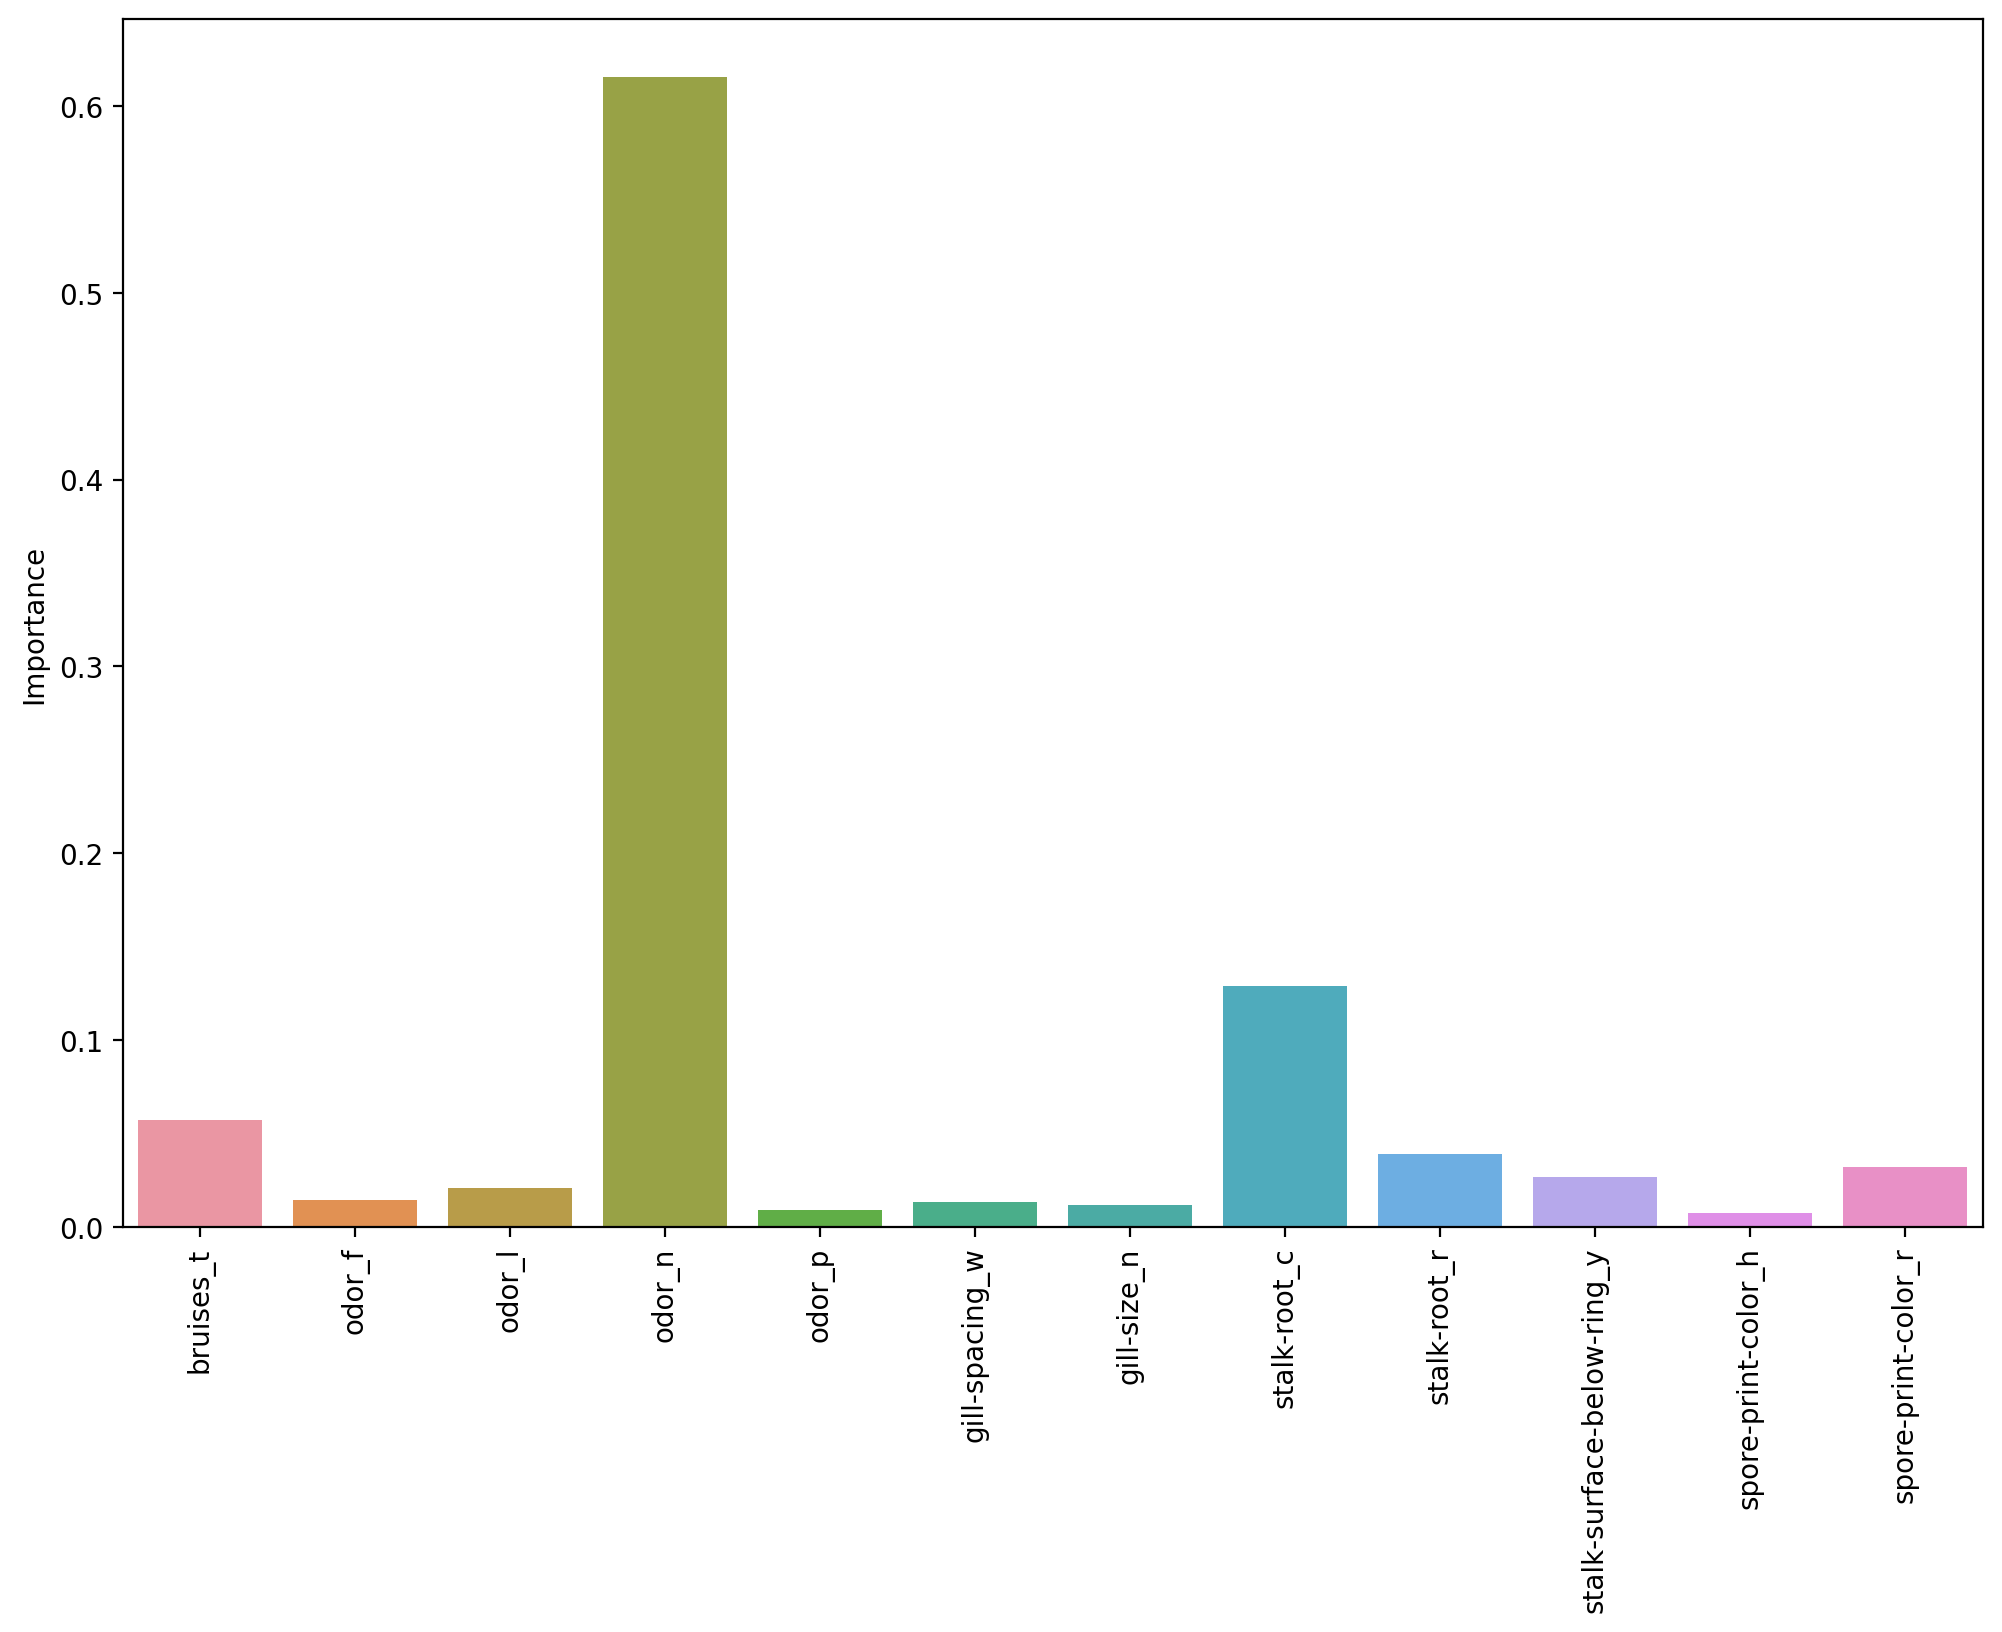

In [39]:
plt.figure(figsize=(12,8),dpi=200)
sns.barplot(data=imp_feat,x=imp_feat.index,y='Importance')
plt.xticks(rotation=90);